
# 📘 Módulo 5: Pronósticos basados en factores de tendencia y estacionalidad

En logística, anticipar la demanda futura o los volúmenes de entrega es clave para:
- Ajustar la capacidad de transporte.
- Planificar inventarios.
- Asignar personal y recursos de distribución.

Los modelos de **series de tiempo** permiten generar pronósticos al identificar patrones como:

1️⃣ **Tendencia:** dirección general (crecimiento o decrecimiento).
2️⃣ **Estacionalidad:** fluctuaciones periódicas (mensuales, trimestrales, anuales).
3️⃣ **Ciclo:** variaciones a largo plazo.
4️⃣ **Ruido:** variaciones aleatorias.

Métodos comunes:
- **Modelos de suavizamiento exponencial (Holt-Winters).**
- **Modelos de regresión estacional.**
- **Modelos ARIMA (AutoRegressive Integrated Moving Average).**

En este módulo aplicaremos Holt-Winters, que combina tendencia y estacionalidad en un modelo práctico.
"""

In [3]:
# ============================================================
# 📦 Ejemplo: Pronóstico mensual de entregas logísticas
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Cargar dataset (puede ser el que generaste en el módulo anterior)
df = pd.read_csv("Series_Tiempo_Entregas_Logistica_6Anios.csv")

# Convertir columna de fechas
df["Fecha"] = pd.to_datetime(df["Fecha"])
df.set_index("Fecha", inplace=True)

# Visualizar los primeros datos
df.head()

,Entregas_mensuales
Fecha,
2019-01-31,415
2019-02-28,453
2019-03-31,521
2019-04-30,572
2019-05-31,519


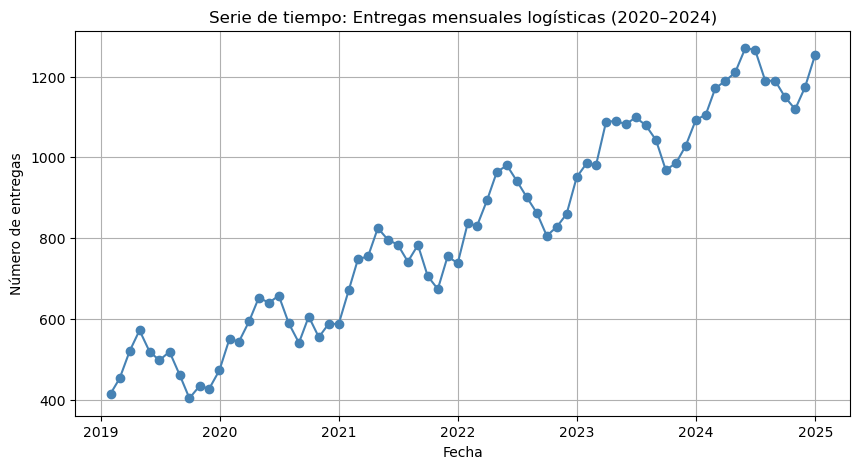

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["Entregas_mensuales"], marker="o", linestyle="-", color="steelblue")
plt.title("Serie de tiempo: Entregas mensuales logísticas (2020–2024)")
plt.xlabel("Fecha")
plt.ylabel("Número de entregas")
plt.grid(True)
plt.show()

C:\Users\JAMAR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


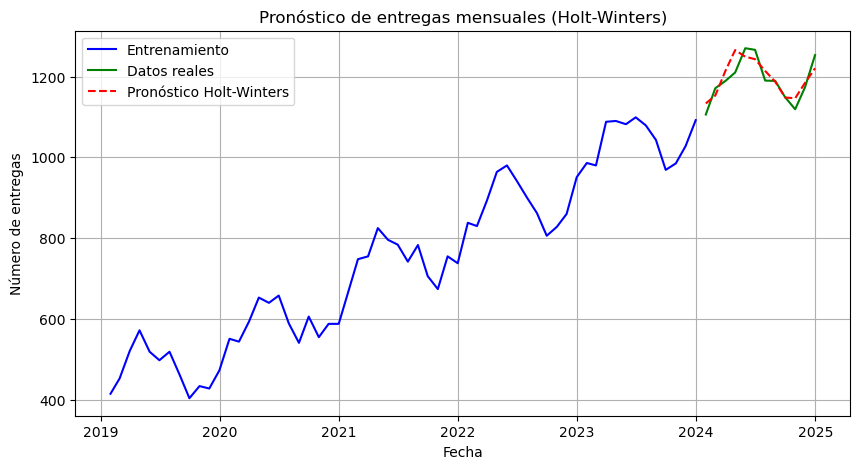

In [5]:
# Separar los últimos 12 meses para prueba
train = df.iloc[:-12]
test = df.iloc[-12:]

# Ajustar modelo con tendencia y estacionalidad aditiva
modelo = ExponentialSmoothing(
    train["Entregas_mensuales"], 
    trend="add", 
    seasonal="add", 
    seasonal_periods=12
).fit()

# Pronóstico de 12 meses
predicciones = modelo.forecast(12)

# Comparar con los datos reales
plt.figure(figsize=(10,5))
plt.plot(train.index, train["Entregas_mensuales"], label="Entrenamiento", color="blue")
plt.plot(test.index, test["Entregas_mensuales"], label="Datos reales", color="green")
plt.plot(predicciones.index, predicciones, label="Pronóstico Holt-Winters", color="red", linestyle="--")
plt.title("Pronóstico de entregas mensuales (Holt-Winters)")
plt.xlabel("Fecha")
plt.ylabel("Número de entregas")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# Calcular métricas de error
mae = mean_absolute_error(test["Entregas_mensuales"], predicciones)
rmse = np.sqrt(mean_squared_error(test["Entregas_mensuales"], predicciones))

print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")

Error Absoluto Medio (MAE): 22.26
Raíz del Error Cuadrático Medio (RMSE): 26.19


"""
Interpretación:

- El modelo Holt-Winters logra capturar tanto la **tendencia creciente** como la **estacionalidad anual**.
- Las métricas de error (MAE y RMSE) permiten cuantificar la precisión del pronóstico.
- En logística, un modelo como este ayuda a estimar la cantidad de entregas futuras, ajustando recursos de transporte y almacenamiento.

Ventajas:
✅ Fácil de implementar.
✅ Adecuado para datos con tendencia + estacionalidad.
✅ Útil para planeación táctica y estratégica.

Limitaciones:
⚠️ No considera factores externos (precios, clima, promociones).
⚠️ Menos preciso si la estacionalidad no es estable.
"""

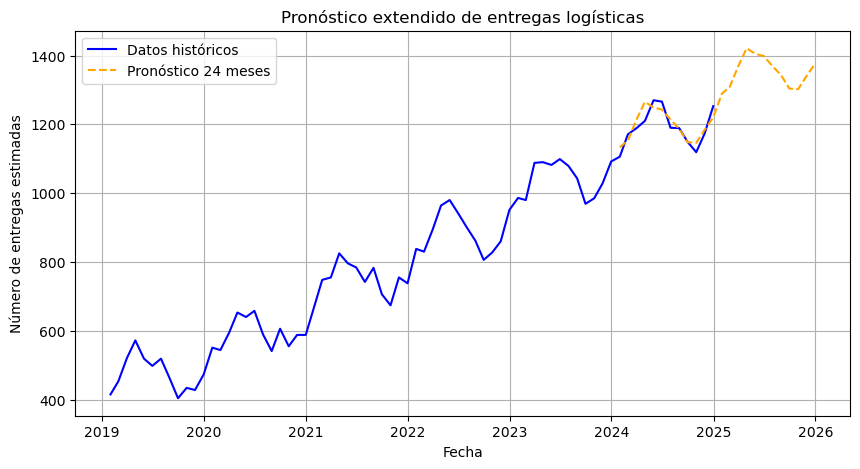

In [8]:
# Pronóstico extendido a 24 meses
pronostico_24m = modelo.forecast(24)

plt.figure(figsize=(10,5))
plt.plot(df.index, df["Entregas_mensuales"], label="Datos históricos", color="blue")
plt.plot(pronostico_24m.index, pronostico_24m, label="Pronóstico 24 meses", color="orange", linestyle="--")
plt.title("Pronóstico extendido de entregas logísticas")
plt.xlabel("Fecha")
plt.ylabel("Número de entregas estimadas")
plt.legend()
plt.grid(True)
plt.show()

"""
✅ Conclusión:
Los modelos de pronóstico basados en tendencia y estacionalidad son herramientas esenciales
para la toma de decisiones logísticas. Permiten anticipar cambios en la demanda,
optimizar inventarios y planificar recursos de transporte con mayor eficiencia.

👉 En el próximo módulo se abordarán los modelos ARIMA y el análisis de residuos para mejorar la precisión de los pronósticos.
"""